In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
retail = pd.read_csv(r"/content/OnlineRetail (1).csv", encoding= 'unicode_escape' )
retail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [5]:
retail.shape

(100247, 8)

In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100247 entries, 0 to 100246
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    100247 non-null  object 
 1   StockCode    100247 non-null  object 
 2   Description  99948 non-null   object 
 3   Quantity     100247 non-null  int64  
 4   InvoiceDate  100247 non-null  object 
 5   UnitPrice    100246 non-null  float64
 6   CustomerID   65312 non-null   float64
 7   Country      100246 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.1+ MB


In [7]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,100247.000000,100246.000000,65312.000000
mean,8.893124,5.392127,15351.562607
std,336.149364,120.742730,1768.838360
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13871.000000
50%,3.000000,2.510000,15311.000000
75%,8.000000,4.250000,16995.250000
max,74215.000000,16888.020000,18283.000000


In [8]:
retail.isnull().sum()

InvoiceNo          0
StockCode          0
Description      299
Quantity           0
InvoiceDate        0
UnitPrice          1
CustomerID     34935
Country            1
dtype: int64

In [9]:
df_null = round(100*(retail.isnull().sum())/len(retail), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.30
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     34.85
Country         0.00
dtype: float64

In [10]:
retail = retail.dropna()
retail.shape

(65312, 8)

In [11]:
retail['CustomerID'] = retail['CustomerID'].astype(str)

In [12]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
retail['Amount'] = retail['Quantity']*retail['UnitPrice']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [14]:
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m.head()

CustomerID
12346.0       0.00
12347.0    1187.18
12348.0    1120.24
12350.0     334.40
12352.0     296.50
Name: Amount, dtype: float64

In [15]:
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,1187.18
2,12348.0,1120.24
3,12350.0,334.40
4,12352.0,296.50


In [16]:
rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()

In [17]:
rfm_f

CustomerID
12346.0      2
12347.0     60
12348.0     23
12350.0     17
12352.0     15
          ... 
18259.0      7
18260.0     40
18269.0      8
18277.0      1
18283.0    102
Name: InvoiceNo, Length: 1669, dtype: int64

In [18]:
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,60
2,12348.0,23
3,12350.0,17
4,12352.0,15


In [19]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,1187.18,60
2,12348.0,1120.24,23
3,12350.0,334.40,17
4,12352.0,296.50,15


In [20]:
rfm.shape

(1669, 3)

In [21]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [22]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
Amount         float64
dtype: object

In [23]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%m/%d/%Y %H:%M')

In [24]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [25]:
max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-02-23 15:53:00')

In [26]:
retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,84 days 07:27:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,84 days 07:27:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,84 days 07:27:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,84 days 07:27:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,84 days 07:27:00


In [27]:
rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,36 days 05:36:00
1,12347.0,28 days 01:23:00
2,12348.0,29 days 05:11:00
3,12350.0,20 days 23:52:00
4,12352.0,7 days 03:20:00


In [28]:
rfm_p.shape

(1669, 2)

In [29]:
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
100222,544811,22625,RED KITCHEN SCALES,6,2011-02-23 15:53:00,8.50,12471.0,Germany,51.0,0 days
100223,544811,22728,ALARM CLOCK BAKELIKE PINK,12,2011-02-23 15:53:00,3.75,12471.0,Germany,45.0,0 days
100224,544811,22741,FUNKY DIVA PEN,48,2011-02-23 15:53:00,0.85,12471.0,Germany,40.8,0 days
100225,544811,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,2011-02-23 15:53:00,4.95,12471.0,Germany,29.7,0 days
100226,544811,POST,POSTAGE,3,2011-02-23 15:53:00,18.00,12471.0,Germany,54.0,0 days


In [30]:
rfm_p

,CustomerID,Diff
0,12346.0,36 days 05:36:00
1,12347.0,28 days 01:23:00
2,12348.0,29 days 05:11:00
3,12350.0,20 days 23:52:00
4,12352.0,7 days 03:20:00
...,...,...
1664,18259.0,77 days 02:15:00
1665,18260.0,32 days 22:49:00
1666,18269.0,69 days 00:14:00
1667,18277.0,29 days 03:19:00


In [31]:
rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,36
1,12347.0,28
2,12348.0,29
3,12350.0,20
4,12352.0,7


In [32]:
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,1187.18,60
2,12348.0,1120.24,23
3,12350.0,334.40,17
4,12352.0,296.50,15


In [33]:
rfm_p.head()

,CustomerID,Diff
0,12346.0,36
1,12347.0,28
2,12348.0,29
3,12350.0,20
4,12352.0,7


In [34]:
rfm_p.dtypes

CustomerID    object
Diff           int64
dtype: object

In [35]:
rfm_p['CustomerID'] = rfm_p.CustomerID.astype(str)

In [36]:
rfm=rfm.loc[:,['CustomerID','Amount','Frequency']]

In [37]:
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,36
1,12347.0,1187.18,60,28
2,12348.0,1120.24,23,29
3,12350.0,334.40,17,20
4,12352.0,296.50,15,7


Text(0.5, 0, 'Attributes')

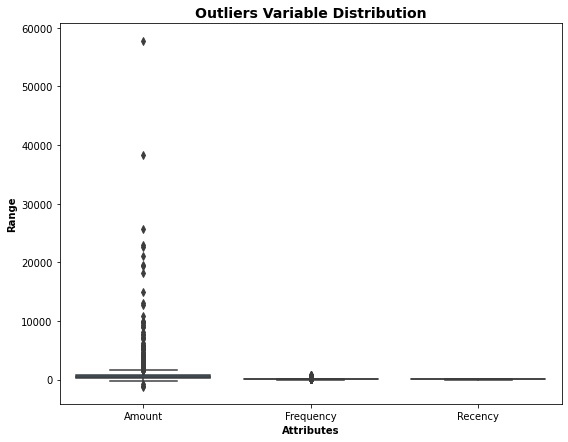

In [38]:
attributes = ['Amount','Frequency','Recency']
plt.figure(figsize=(9,7))

sns.boxplot(data = rfm[attributes])

plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [39]:
Q1 = rfm.Amount.quantile(0.25)
Q3 = rfm.Amount.quantile(0.75)
IQR = Q3 - Q1

In [40]:
IQR

568.25

In [41]:
Q1

185.97

In [42]:
Q3

754.22

In [43]:
Q1 - 1.5*IQR

-666.405

In [44]:
Q3 + 1.5*IQR

1606.595

In [45]:
Q1 = rfm.Amount.quantile(0.25)
Q3 = rfm.Amount.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

Q1 = rfm.Recency.quantile(0.25)
Q3 = rfm.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

Q1 = rfm.Frequency.quantile(0.25)
Q3 = rfm.Frequency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [46]:
rfm

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,36
1,12347.0,1187.18,60,28
2,12348.0,1120.24,23,29
3,12350.0,334.40,17,20
4,12352.0,296.50,15,7
...,...,...,...,...
1663,18257.0,348.80,17,1
1664,18259.0,376.30,7,77
1665,18260.0,769.52,40,32
1666,18269.0,138.90,8,69


In [47]:
rfm.describe()

,Amount,Frequency,Recency
count,1414.000000,1414.000000,1414.000000
mean,396.746697,24.937058,39.201556
std,328.264658,20.503765,27.617465
min,-295.090000,1.000000,0.000000
25%,165.000000,9.000000,15.000000
50%,307.540000,19.000000,33.000000
75%,556.527500,36.000000,70.000000
max,1592.610000,87.000000,84.000000


In [48]:
rfm

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,36
1,12347.0,1187.18,60,28
2,12348.0,1120.24,23,29
3,12350.0,334.40,17,20
4,12352.0,296.50,15,7
...,...,...,...,...
1663,18257.0,348.80,17,1
1664,18259.0,376.30,7,77
1665,18260.0,769.52,40,32
1666,18269.0,138.90,8,69


In [50]:
rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

scaler = StandardScaler()

rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled

array([[-1.20904598, -1.11907119, -0.11596606],
       [ 2.40876663,  1.71067834, -0.40574031],
       [ 2.20477366, -0.09450671, -0.36951853],
       ...,
       [ 1.13598945,  0.73490264, -0.26085318],
       [-0.78576208, -0.82633848,  1.07935274],
       [-1.24790033, -1.16785998, -0.36951853]])

In [51]:
rfm_df_scaled

array([[-1.20904598, -1.11907119, -0.11596606],
       [ 2.40876663,  1.71067834, -0.40574031],
       [ 2.20477366, -0.09450671, -0.36951853],
       ...,
       [ 1.13598945,  0.73490264, -0.26085318],
       [-0.78576208, -0.82633848,  1.07935274],
       [-1.24790033, -1.16785998, -0.36951853]])

In [52]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-1.209046,-1.119071,-0.115966
1,2.408767,1.710678,-0.405740
2,2.204774,-0.094507,-0.369519
3,-0.189995,-0.387239,-0.695515
4,-0.305492,-0.484817,-1.166398


In [53]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=4)

In [54]:
kmeans.labels_

array([1, 2, 2, ..., 2, 0, 1], dtype=int32)